In [1]:
from bs4 import BeautifulSoup

# sample  HTML document
html_doc = """
<html>
<head>
<title>The Dormouse's story</title>
</head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were</p>
</body>
</html>
"""
# Create a  BeautifulSoup object and specify the parser
soup = BeautifulSoup(html_doc, 'html.parser')
# Extract and print the title of the  HTML document
print(soup.title.string)






The Dormouse's story


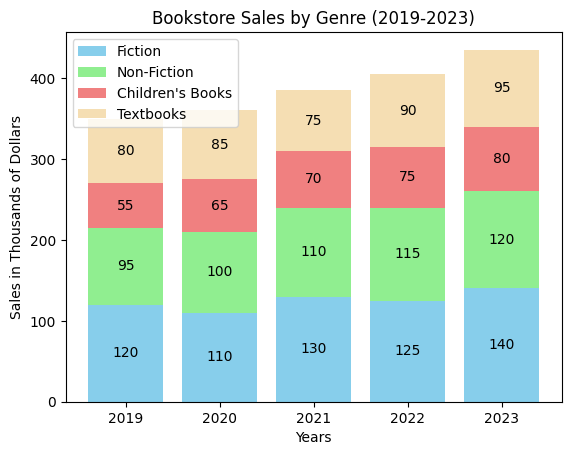

In [1]:
import matplotlib.pyplot as plt

# Data
years = ['2019', '2020', '2021', '2022', '2023']
fiction = [120, 110, 130, 125, 140]
non_fiction = [95, 100, 110, 115, 120]
children_books = [55, 65, 70, 75, 80]
textbooks = [80, 85, 75, 90, 95]

# Plotting
fig, ax = plt.subplots()

# Stacked bar segments
bar1 = ax.bar(years, fiction, label='Fiction', color='skyblue')
bar2 = ax.bar(years, non_fiction, bottom=fiction, label='Non-Fiction', color='lightgreen')
bar3 = ax.bar(years, children_books, bottom=[i+j for i,j in zip(fiction, non_fiction)], label="Children's Books", color='lightcoral')
bar4 = ax.bar(years, textbooks, bottom=[i+j+k for i,j,k in zip(fiction, non_fiction, children_books)], label='Textbooks', color='wheat')

# Adding labels
ax.set_xlabel('Years')
ax.set_ylabel('Sales in Thousands of Dollars')
ax.set_title('Bookstore Sales by Genre (2019-2023)')
ax.legend()

# Adding text labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    xytext=(0, 0),  # 0 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

plt.show()


In [9]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

#  Create an array from the given data. Then, sort this array in descending order. 
Daily_Steps = [6532,8741,5403,7829,9126,6087,7324,8560,5972,7645,68918102,7456,6213,9034]
steps_a =  np.array(Daily_Steps)

# Calculate the mean and standard deviation of the daily steps, rounding to the nearest whole number. Display the results. 
mean = round(np.mean(steps_a))
print("Mean: ", mean)
std_dev =  round(np.std(steps_a))
print("Standard Deviation: ", std_dev)

#. Determine the 25th, 50th (median), and 75th percentiles of the data. Display these results on screen.
percentiles = np.percentile(steps_a, [25, 50, 75])
print(f"25th percentile:,{percentiles[0]}\n50th percentile (median):,{percentiles[1]}\n75th percentile:,{percentiles[2]}")

above_7500 = np.sum(steps_a >7500)
print("The number  of days with more than 7500 steps: ", above_7500)


Mean:  4929573
Standard Deviation:  17747225
25th percentile:,6292.75
50th percentile (median):,7550.5
75th percentile:,8695.75
The number  of days with more than 7500 steps:  7


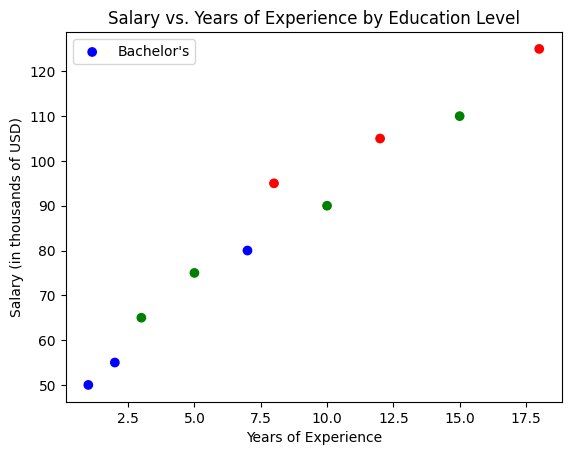

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = {
    'Years of Experience': [1, 2, 3, 5, 7, 8, 10, 12, 15, 18],
    'Education Level': [0, 0, 1, 1, 0, 2, 1, 2, 1, 2],
    'Salary': [50, 55, 65, 75, 80, 95, 90, 105, 110, 125]
}

df = pd.DataFrame(data)

# Colors for education levels
colors = {0: 'blue', 1: 'green', 2: 'red'}
df['Color'] = df['Education Level'].map(colors)

# Scatter plot
plt.scatter(df['Years of Experience'], df['Salary'], c=df['Color'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in thousands of USD)')
plt.title('Salary vs. Years of Experience by Education Level')
plt.legend(['Bachelor\'s', 'Master\'s', 'PhD'], loc='upper left')
plt.show()


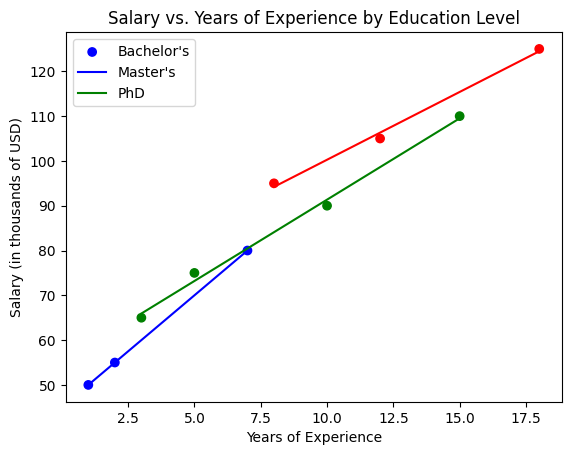

In [3]:
# Function to plot line of best fit
def plot_best_fit(df, education_level, color):
    subset = df[df['Education Level'] == education_level]
    m, b = np.polyfit(subset['Years of Experience'], subset['Salary'], 1)
    plt.plot(subset['Years of Experience'], m * subset['Years of Experience'] + b, color=color)

# Scatter plot with lines of best fit
plt.scatter(df['Years of Experience'], df['Salary'], c=df['Color'])
plot_best_fit(df, 0, 'blue')
plot_best_fit(df, 1, 'green')
plot_best_fit(df, 2, 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in thousands of USD)')
plt.title('Salary vs. Years of Experience by Education Level')
plt.legend(['Bachelor\'s', 'Master\'s', 'PhD'], loc='upper left')
plt.show()


In [8]:
# Prepare data
X = df[['Years of Experience', 'Education Level']]
y = df['Salary']

# Add a column of ones to X to include the intercept in the model
X = np.c_[np.ones(X.shape[0]), X]

# Fit the model using the normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Display coefficients and intercept
print(f'Coefficients: {theta[1:]}')
print(f'Intercept: {theta[0]}')

Coefficients: [3.61280809 6.47356225]
Intercept: 49.26269222666944


In [6]:
# Predictions
pred_6_bachelors = theta[0] + theta[1] * 6 + theta[2] * 0
pred_9_phd = theta[0] + theta[1] * 9 + theta[2] * 2

print(f'Predicted salary for 6 years experience and Bachelor\'s degree: {round(pred_6_bachelors)}')
print(f'Predicted salary for 9 years experience and PhD: {round(pred_9_phd)}')


Predicted salary for 6 years experience and Bachelor's degree: 71
Predicted salary for 9 years experience and PhD: 95


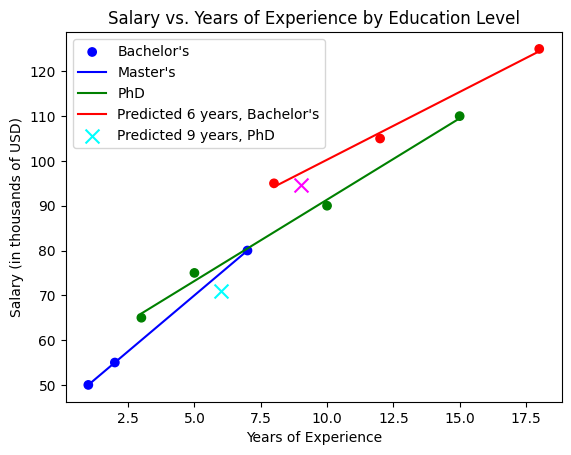

In [9]:
# Scatter plot with lines of best fit
plt.scatter(df['Years of Experience'], df['Salary'], c=df['Color'])
plot_best_fit(df, 0, 'blue')
plot_best_fit(df, 1, 'green')
plot_best_fit(df, 2, 'red')

# Add predicted values
plt.scatter([6], [pred_6_bachelors], color='cyan', marker='x', s=100, label='Predicted 6 years, Bachelor\'s')
plt.scatter([9], [pred_9_phd], color='magenta', marker='x', s=100, label='Predicted 9 years, PhD')

plt.xlabel('Years of Experience')
plt.ylabel('Salary (in thousands of USD)')
plt.title('Salary vs. Years of Experience by Education Level')
plt.legend(['Bachelor\'s', 'Master\'s', 'PhD', 'Predicted 6 years, Bachelor\'s', 'Predicted 9 years, PhD'], loc='upper left')
plt.show()
